In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data if we use ',' as a separator and decimal then we make sure that the dtypes are correct
data = pd.read_csv('/Users/mariasoriano/Documents/tech_challenge/data-analytics-challenge/data/measurements.csv',sep=',',decimal=',')
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


The following notebook aims to explore the data in such a way that we can extract conclusions on what's the best combustible to use for the company.
In order to accomplish our objective I am going to develop and **Exploratory Data Analysis** where I am going to make data summaries and visualizations.

Also, I will see if the data we have is enough to accomplish our goal and will check the relationship between the independent variables.

To conclude with this technical challenge **I will provide 2 models that will attempt to predict the fuel compsution:**
-  **Linear Regression Model**
- **Decission Tree Regresso Model.**

## 1. Exploratory Data Analysis
- 1.1 Data summary
- 1.2 Dealing with null values
- 1.3 Distribution of the Numerical features
- 1.4 Check for class imbalance
- 1.5 Grouping data by gas type
- 1.6 Boxplots to check for more info
- 1.7 Distinction between numerical/categorical features
- 1.8 Correlation Matrix


#### 1.1 Data summary
Contains information of the features dtypes and statistics.

In [3]:
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


None

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


#### 1.2 Dealing with null values

In [4]:
def nulls_percent (df):
    
    '''
    Shows percent of nulls in a data frame.
    
    Args:
        df: The dataframe we want to check out.
        
    Returns:
        A new df with 2columns:
        - 'column_name' with the name of the original df columns
        - 'nulls_percentage' with the percentage of nulls in every column
    '''
    nulls_percent = pd.DataFrame(df.isna().sum()/len(df)).reset_index()
    nulls_percent.columns = ['column_name', 'nulls_percentage']
    
    return nulls_percent

In [5]:
nulls_percent(data)

,column_name,nulls_percentage
0,distance,0.000000
1,consume,0.000000
2,speed,0.000000
3,temp_inside,0.030928
4,temp_outside,0.000000
5,specials,0.760309
6,gas_type,0.000000
7,AC,0.000000
8,rain,0.000000
9,sun,0.000000


In [6]:
# Dropping the cols with > 70% null values
data = data.drop(['specials','refill liters','refill gas'],axis=1)
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [7]:
# For the 'temp_inside' col since the amount of nulls is low I will replace with the mode
data['temp_inside'].fillna(data['temp_inside'].mode()[0], inplace=True)

In [8]:
nulls_percent(data)

,column_name,nulls_percentage
0,distance,0.0
1,consume,0.0
2,speed,0.0
3,temp_inside,0.0
4,temp_outside,0.0
5,gas_type,0.0
6,AC,0.0
7,rain,0.0
8,sun,0.0


#### 1.3 Distribution of the numerical features

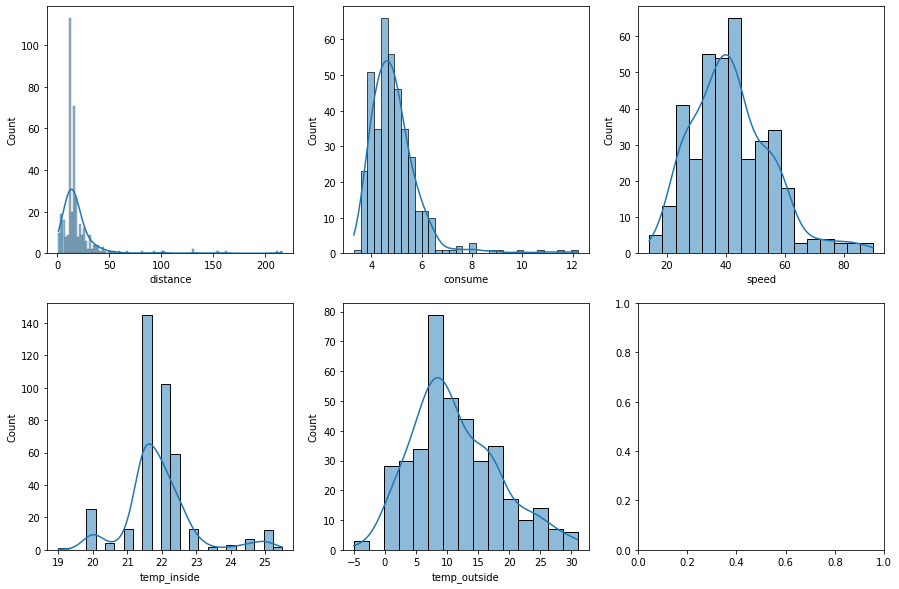

In [9]:
# Distribution of the numerical features
fig, ax = plt.subplots(2,3, figsize=(15,10))

sns.histplot(data['distance'], kde=True, ax = ax[0,0]);
sns.histplot(data['consume'], kde=True, ax = ax[0,1]);
sns.histplot(data['speed'], kde=True, ax = ax[0,2]);
sns.histplot(data['temp_inside'], kde=True, ax = ax[1,0]);
sns.histplot(data['temp_outside'], kde=True, ax = ax[1,1]);

#### 1.4 Checks for class imbalance
We don't have a significant class imbalance.

Anyway, it would be good to add some more E10 samples if possible but due to the short period of time to complete this challenge I will leave like this.

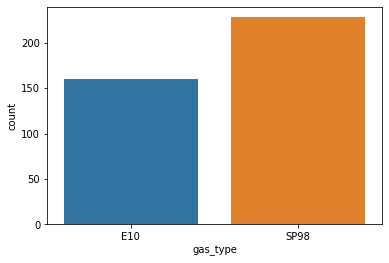

In [10]:
sns.countplot(x=data['gas_type'], data=data)
plt.show()

[Text(0.5, 0, 'Gas type'), Text(0, 0.5, 'Count')]

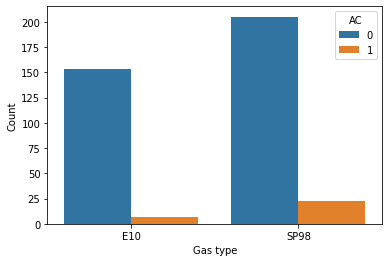

In [11]:
fig = sns.countplot(x=data['gas_type'], hue='AC', data=data)
fig.set(xlabel='Gas type', ylabel='Count')

#### 1.5 Grouping data by gas type

Let's now group by the data by **gas type** and describe it to see the **statistics.**

The mean consume for the **E10 combustible** seems to be lower than the mean consumer for the **SP98 combustible**.


There could be several factors that affect the **consume** let's plot a **correlation matrix** next.

In [12]:
E10 = data[data['gas_type']=='E10']
SP98 = data[data['gas_type']=='SP98']
print(' -----  Describe table for E10: -----')
display(E10.describe())
print(' ----- Describe table for SP98: -----')
display(SP98.describe())


 -----  Describe table for E10: -----


,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,21.096250,4.931250,43.506250,21.909375,10.118750,0.043750,0.100000,0.075000
std,20.307234,0.900956,14.077949,0.656060,6.392185,0.205181,0.300942,0.264218
min,1.700000,3.700000,14.000000,21.000000,-5.000000,0.000000,0.000000,0.000000
25%,12.075000,4.400000,35.000000,21.500000,6.000000,0.000000,0.000000,0.000000
50%,15.400000,4.800000,42.000000,21.500000,9.000000,0.000000,0.000000,0.000000
75%,21.200000,5.300000,51.000000,22.500000,14.250000,0.000000,0.000000,0.000000
max,130.300000,10.800000,88.000000,25.000000,27.000000,1.000000,1.000000,1.000000


 ----- Describe table for SP98: -----


,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,18.639912,4.899123,40.820175,21.921053,12.228070,0.100877,0.140351,0.087719
std,24.179598,1.118408,13.170122,1.180941,7.271373,0.301829,0.348115,0.283509
min,1.300000,3.300000,16.000000,19.000000,-3.000000,0.000000,0.000000,0.000000
25%,11.800000,4.200000,32.000000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.150000,4.700000,39.500000,22.000000,11.000000,0.000000,0.000000,0.000000
75%,18.150000,5.225000,48.000000,22.000000,17.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


#### 1.6 Some more boxplots to see relation between features

[Text(0.5, 0, 'Gas type'),
 Text(0, 0.5, 'Speed'),
 Text(0.5, 1.0, 'Consume by speed')]

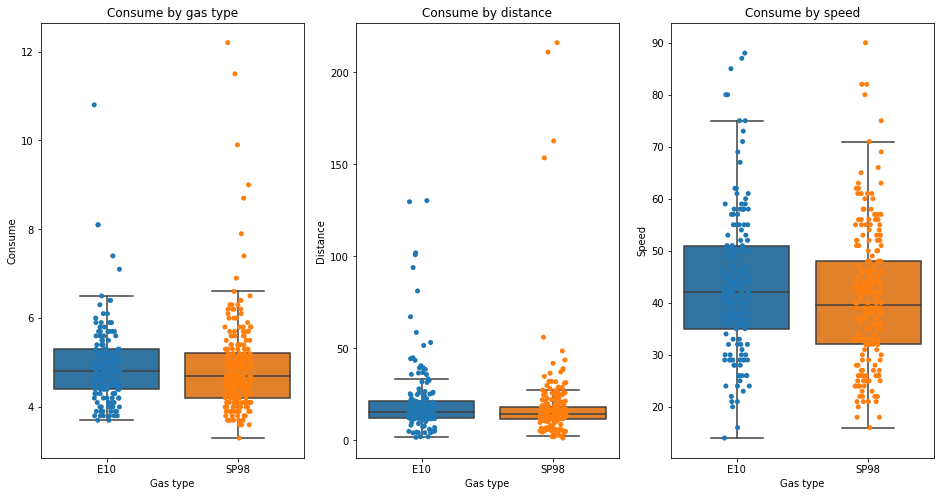

In [15]:
# Now let's plot 'consume x distance filtered', 'consume x gas type' and 'consume x speed'

fig = plt.figure(figsize=(16,8))

# gas type x consume
ax = fig.add_subplot(1,3,1)
consume = sns.boxplot(x='gas_type', y='consume', data=data, showfliers=False, ax=ax)
consume = sns.stripplot(x='gas_type', y='consume', data=data, jitter=True, ax=ax)

# gas_type x distance
ax = fig.add_subplot(1,3,2)
distance = sns.boxplot(x='gas_type', y='distance', data=data, showfliers=False, ax=ax)
distance = sns.stripplot(x='gas_type', y='distance', data=data, jitter=True, ax=ax)

# gas_type x speed
ax = fig.add_subplot(1,3,3)
speed = sns.boxplot(x='gas_type', y='speed', data=data, showfliers=False, ax=ax)
speed = sns.stripplot(x='gas_type', y='speed', data=data, jitter=True, ax=ax)

consume.set(xlabel = "Gas type", ylabel = "Consume", title = 'Consume by gas type')
distance.set(xlabel = "Gas type", ylabel = "Distance", title = 'Consume by distance')
speed.set(xlabel = "Gas type", ylabel = "Speed", title = 'Consume by speed')

In [ ]:
fig = plt.figure(figsize=(16,8))

# gas type x consume
ax = fig.add_subplot(1,3,1)
consume = sns.boxplot(x='AC', y='consume', data=data, showfliers=False, ax=ax)
consume = sns.stripplot(x='AC', y='consume', data=data, jitter=True, ax=ax)

# gas_type x distance
ax = fig.add_subplot(1,3,2)
distance = sns.boxplot(x='rain', y='consume', data=data, showfliers=False, ax=ax)
distance = sns.stripplot(x='rain', y='consume', data=data, jitter=True, ax=ax)

# gas_type x speed
ax = fig.add_subplot(1,3,3)
speed = sns.boxplot(x='sun', y='speed', data=data, showfliers=False, ax=ax)
speed = sns.stripplot(x='sun', y='speed', data=data, jitter=True, ax=ax)

consume.set(xlabel = "AC ON = 1, AC OFF = 0", ylabel = "Consume", title = 'Consume with and without AC')
distance.set(xlabel = "not rainning = 0, Rainning = 1 ", ylabel = "Consume", title = 'Consume on rainy and not rainy days')
speed.set(xlabel = "not sunny = 0, Sunny = 1", ylabel = "Consume", title = 'Consume on sunny and not sunny days')

#### 1.7 Distinction between numerical continuous, numerical discrete and categorical features

In [ ]:
# Distinction between Numerical continuous, Numerical discrete and Categorical features.
numerical_continuous = data.select_dtypes(['number'])
numerical_continuous = numerical_continuous.drop(['AC', 'rain', 'sun'], axis=1)
display(numerical_continuous.head())

numerical_discrete = data.select_dtypes('int64')
numerical_discrete = numerical_discrete.drop(['speed', 'temp_outside'], axis=1)
display(numerical_discrete.head())

categorical = data.select_dtypes(['object'])
display(categorical.head())

#### 1.8 Correlation Matrix

Of course there is a difference between **correlation** and **causal relationships.**

##### Correlation DOES NOT imply causation.

In [ ]:
correlations_matrix = numerical_continuous.corr()
sns.heatmap(round(correlations_matrix.corr(), 2), annot=True)
plt.show()

## 2. Linear Regression
- 2.1 Applying the Label Encoder to Categorical Features
- 2.2 Train-test split
- 2.3 Applying the Standard Scaler to the Numerical Features
- 2.4 Linear Regression
- 2.5 Error Metrics
- 2.6 Plot of regression line with different coeficients (distance, speed and temperature outside)

#### 2.1 Label Encoder for the Categorical features

In [ ]:
# Explain why the Label Encoder works better in this case
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['gas_type'] = label_encoder.fit_transform(data['gas_type'])

#### 2.2 Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='consume').values
y = data['consume']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1223)

#### 2.3 Standard Scaler for the Numerical features

In [ ]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()

X_train_sscaled = sscaler.fit_transform(X_train)
X_test_sscaled = sscaler.transform(X_test)

#### 2.4 Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg.fit(X_train_sscaled, y_train)
y_pred = lreg.predict(X_test_sscaled)

#### 2.5 Error Metrics

In [ ]:
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

lr_mse = mean_squared_error(y_test, y_pred) 
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_pred)

lr_score_train = lreg.score(X_train_sscaled, y_train)
lr_score_test = lreg.score(X_test_sscaled, y_test)

In [ ]:
print('MSE for the Linear Model is:', lr_mse)
print('RMSE for the Linear Model is:', lr_rmse)
print('MAE for the Linear Model is:', lr_mae)
print('Score for the train data and the Linear Model is:', lr_score_train)
print('Score for the test data and the Linear Model is:', lr_score_test)


#### 2.6 Plot of regression line with different coefficients

In [ ]:
regression_line = lreg.intercept_ + lreg.coef_[0]*data['distance']
plt.plot(data['distance'], regression_line, c = 'orange')
sns.scatterplot(x='distance',y='consume',data=data)
plt.show()

In [ ]:
regression_line = lreg.intercept_ + lreg.coef_[0]*data['speed']
plt.plot(data['speed'], regression_line, c = 'orange')
sns.scatterplot(x='speed',y='consume',data=data)
plt.show()

In [ ]:
regression_line = lreg.intercept_ + lreg.coef_[0]*data['temp_outside']
plt.plot(data['temp_outside'], regression_line, c = 'orange')
sns.scatterplot(x='temp_outside',y='consume',data=data)
plt.show()

## 3. Decission Tree
- 3.1 X-y split
- 3.2 Train-test split
- 3.3 Standard Scaler
- 3.4 MinMaxScaler
- 3.5 Decission Tree Regresor
- 3.6 Error Metrics


#### 3.1 X-y Split

In [ ]:
#X = data.drop(['consume'],axis=1)
#y = data['consume']

#### 3.2 Train-test split

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.40,random_state=100)

#### 3.3 Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()

X_train_sscaled = sscaler.fit_transform(X_train)
X_test_sscaled = sscaler.transform(X_test)

#### 3.4 MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()

X_train_mmscaled = minmaxscaler.fit_transform(X_train)
X_test_mmscaled = minmaxscaler.transform(X_test)

#### 3.5 Decission Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

data = DecisionTreeRegressor(criterion = 'friedman_mse', splitter = 'best', max_depth = 3, random_state = 60)
data.fit(X_train_sscaled, y_train)
data_decissiontree = data.predict(X_test_sscaled)

#### 3.5 Error Metrics

In [ ]:
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error

print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, data_decissiontree)))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, data_decissiontree))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, data_decissiontree))

## 4. Conclusions
- More SP98 samples than E10: **At 1.4** we could see that we have more SP98 samples than E10 samples. With more time we could have scrapped some data or add data from another csv in order to have more balanced data. Anyway, the difference is not so big so it will not affect the model so much.
--------
- When grouping and describing the statistics by gas type **1.5** we could see that the **mean shows no significant difference between E10 and SP98.**
--------
- E10 seems to be used for longers distances. **1.6** shows that info using the boxplots.
--------
- At higher speeds E10 seems to be more efficient. **1.6**
--------
- In order to make a better decision we would need to know the price of this two combustibles.